# Import Libraries

This section imports all the necessary Python libraries required for the subsequent data manipulation, model building, and analysis.

**Code Functionality:**

* `warnings`: Used to manage and suppress warning messages during the execution of the code.
* `pandas`: Provides data structures (like DataFrames) and functions for data analysis and manipulation.
* `IPython.display.display`: Allows for the explicit display of output within IPython environments (like Jupyter notebooks).
* `numpy`: Fundamental package for numerical computation in Python, supporting arrays and mathematical operations.
* `sklearn.model_selection.train_test_split`: Used to split datasets into training and testing sets.
* `tensorflow`: An open-source machine learning framework.
* `tensorflow.keras`: TensorFlows high-level API for building and training neural networks.
* `tensorflow.keras.layers`: Contains various building blocks (layers) for creating neural network architectures.
* `imblearn.over_sampling.RandomOverSampler`: A technique to balance datasets by oversampling the minority class.
* `imblearn.under_sampling.RandomUnderSampler`: A technique to balance datasets by undersampling the majority class.
* `shap`: A library used to explain the output of machine learning models.
* `matplotlib.pyplot`: A plotting library used for creating visualizations.
* `sklearn.preprocessing.StandardScaler`: A method for standardizing numerical features by removing the mean and scaling to unit variance.

**Purpose:**

This block ensures that all the tools needed for data handling, model development (using TensorFlow/Keras), and analysis (including handling class imbalance with imblearn and model explainability with SHAP) are readily available in the current environment. The inclusion of `matplotlib` suggests that visualizations will be used later in the analysis.

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
from IPython.display import display
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load and Inspect the Credit Card Fraud Detection Dataset

This section loads the `creditcard.csv` dataset into a pandas DataFrame and provides initial information about its structure, content, and class distribution.

**Code Functionality:**

* **`pd.read_csv('creditcard.csv')`**: Reads the data from the specified CSV file into a pandas DataFrame named `cc_df`.
* **`print("Credit Card Fraud Detection Dataset Head:")`**: Prints a descriptive header for the DataFrame's head.
* **`display(cc_df.head())`**: Displays the first few rows of the DataFrame to get a glimpse of the data.
* **`print("\nCredit Card Fraud Detection Dataset Info:")`**: Prints a descriptive header for the DataFrame's information.
* **`cc_df.info()`**: Provides a concise summary of the DataFrame, including data types and non-null values.
* **`print("\nCredit Card Fraud Detection Dataset Describe:")`**: Prints a descriptive header for the DataFrame's descriptive statistics.
* **`display(cc_df.describe())`**: Generates and displays descriptive statistics of the numerical columns in the DataFrame, such as mean, standard deviation, and quartiles.
* **`print("\nCredit Card Fraud Detection Dataset Class Distribution:")`**: Prints a descriptive header for the class distribution.
* **`display(cc_df['Class'].value_counts())`**: Shows the number of occurrences for each unique value in the 'Class' column (0 for non-fraudulent, 1 for fraudulent).
* **`print("\nClass Ratio (Fraudulent / Total):", cc_df['Class'].sum() / len(cc_df))`**: Calculates and prints the ratio of fraudulent transactions to the total number of transactions, highlighting the class imbalance.

**Purpose:**

This block loads the credit card fraud detection dataset and performs an initial exploratory data analysis. This helps in understanding the dataset's structure, the types of features it contains, basic statistical properties of the numerical features, and, most importantly, the distribution of the target variable ('Class'), which is crucial for understanding the class imbalance problem in this dataset. The output of this block provides key insights into the nature of the data we will be working with.

In [2]:
# Load the Credit Card Fraud Detection dataset
cc_df = pd.read_csv('creditcard.csv')

print("Credit Card Fraud Detection Dataset Head:")
display(cc_df.head())
print("\nCredit Card Fraud Detection Dataset Info:")
cc_df.info()
print("\nCredit Card Fraud Detection Dataset Describe:")
display(cc_df.describe())
print("\nCredit Card Fraud Detection Dataset Class Distribution:")
display(cc_df['Class'].value_counts())
print("\nClass Ratio (Fraudulent / Total):", cc_df['Class'].sum() / len(cc_df))

Credit Card Fraud Detection Dataset Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Credit Card Fraud Detection Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Credit Card Fraud Detection Dataset Class Distribution:


Class
0    284315
1       492
Name: count, dtype: int64


Class Ratio (Fraudulent / Total): 0.001727485630620034


# Load and Inspect the Simulated Credit Card Transactions Training Dataset

This section loads the `fraudTrain.csv` dataset, which contains simulated credit card transaction data for training a fraud detection model. It then provides initial insights into the dataset's structure, content, and the distribution of the target variable ('is_fraud').

**Code Functionality:**

* **`pd.read_csv('fraudTrain.csv')`**: Reads the data from the specified CSV file into a pandas DataFrame named `fraud_train_df`.
* **`print("\n\nSimulated Fraud Training Dataset Head:")`**: Prints a descriptive header for the DataFrame's head, with extra newlines for visual separation.
* **`display(fraud_train_df.head())`**: Displays the first few rows of the training DataFrame to understand its features.
* **`print("\nSimulated Fraud Training Dataset Info:")`**: Prints a descriptive header for the DataFrame's information.
* **`fraud_train_df.info()`**: Provides a summary of the training DataFrame, including data types and non-null values for each column.
* **`print("\nSimulated Fraud Training Dataset Describe:")`**: Prints a descriptive header for the descriptive statistics of the training data.
* **`display(fraud_train_df.describe())`**: Generates and displays descriptive statistics for the numerical columns in the training DataFrame.
* **`print("\nSimulated Fraud Training Dataset Class Distribution (Train):")`**: Prints a descriptive header for the class distribution in the training set.
* **`display(fraud_train_df['is_fraud'].value_counts())`**: Shows the counts of each class (True for fraudulent, False for non-fraudulent) in the 'is_fraud' column of the training DataFrame.
* **`print("\nClass Ratio (Fraudulent / Total) (Train):", fraud_train_df['is_fraud'].sum() / len(fraud_train_df))`**: Calculates and prints the proportion of fraudulent transactions in the training dataset, highlighting the class imbalance within the training data.

**Purpose:**

This block loads the simulated fraud transaction training data and performs an initial examination. This step is crucial for understanding the features available for training, the data types, and for quantifying the extent of class imbalance in the training set, which will likely need to be addressed before building an effective fraud detection model.

In [3]:
# Load the Simulated Credit Card Transactions training dataset
fraud_train_df = pd.read_csv('fraudTrain.csv')

print("\n\nSimulated Fraud Training Dataset Head:")
display(fraud_train_df.head())
print("\nSimulated Fraud Training Dataset Info:")
fraud_train_df.info()
print("\nSimulated Fraud Training Dataset Describe:")
display(fraud_train_df.describe())
print("\nSimulated Fraud Training Dataset Class Distribution (Train):")
display(fraud_train_df['is_fraud'].value_counts())
print("\nClass Ratio (Fraudulent / Total) (Train):", fraud_train_df['is_fraud'].sum() / len(fraud_train_df))



Simulated Fraud Training Dataset Head:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



Simulated Fraud Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 n

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00



Simulated Fraud Training Dataset Class Distribution (Train):


is_fraud
0    1289169
1       7506
Name: count, dtype: int64


Class Ratio (Fraudulent / Total) (Train): 0.005788651743883394


# Load and Inspect the Simulated Credit Card Transactions Testing Dataset

This section loads the `fraudTest.csv` dataset, which contains simulated credit card transaction data intended for evaluating the performance of a trained fraud detection model. Similar to the training data inspection, this block provides initial insights into the testing dataset's structure, content, and the distribution of the target variable ('is_fraud').

**Code Functionality:**

* **`pd.read_csv('fraudTest.csv')`**: Reads the data from the specified CSV file into a pandas DataFrame named `fraud_test_df`.
* **`print("\n\nSimulated Fraud Testing Dataset Head:")`**: Prints a descriptive header for the DataFrame's head, with extra newlines for visual separation.
* **`display(fraud_test_df.head())`**: Displays the first few rows of the testing DataFrame to understand its features and format.
* **`print("\nSimulated Fraud Testing Dataset Info:")`**: Prints a descriptive header for the DataFrame's information.
* **`fraud_test_df.info()`**: Provides a summary of the testing DataFrame, including data types and non-null values for each column, ensuring it aligns with the training data structure.
* **`print("\nSimulated Fraud Testing Dataset Describe:")`**: Prints a descriptive header for the descriptive statistics of the testing data.
* **`display(fraud_test_df.describe())`**: Generates and displays descriptive statistics for the numerical columns in the testing DataFrame, allowing for a comparison of the statistical properties between the training and testing sets.
* **`print("\nSimulated Fraud Testing Dataset Class Distribution (Test):")`**: Prints a descriptive header for the class distribution in the testing set.
* **`display(fraud_test_df['is_fraud'].value_counts())`**: Shows the counts of each class (True for fraudulent, False for non-fraudulent) in the 'is_fraud' column of the testing DataFrame, which is important for understanding the baseline performance and the challenges of evaluation on an imbalanced test set.
* **`print("\nClass Ratio (Fraudulent / Total) (Test):", fraud_test_df['is_fraud'].sum() / len(fraud_test_df))`**: Calculates and prints the proportion of fraudulent transactions in the testing dataset, which should ideally be similar to the class ratio in the training data to ensure a representative evaluation.

**Purpose:**

This block loads the simulated fraud transaction testing data and performs an initial examination to understand its structure, feature types, and the distribution of the target variable. This step is crucial for ensuring the testing data is suitable for evaluating the performance of the model trained on the `fraudTrain.csv` dataset and for understanding the inherent class imbalance in the evaluation set.

In [4]:
# Load the Simulated Credit Card Transactions testing dataset
fraud_test_df = pd.read_csv('fraudTest.csv')

print("\n\nSimulated Fraud Testing Dataset Head:")
display(fraud_test_df.head())
print("\nSimulated Fraud Testing Dataset Info:")
fraud_test_df.info()
print("\nSimulated Fraud Testing Dataset Describe:")
display(fraud_test_df.describe())
print("\nSimulated Fraud Testing Dataset Class Distribution (Test):")
display(fraud_test_df['is_fraud'].value_counts())
print("\nClass Ratio (Fraudulent / Total) (Test):", fraud_test_df['is_fraud'].sum() / len(fraud_test_df))



Simulated Fraud Testing Dataset Head:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



Simulated Fraud Testing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 1

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000



Simulated Fraud Testing Dataset Class Distribution (Test):


is_fraud
0    553574
1      2145
Name: count, dtype: int64


Class Ratio (Fraudulent / Total) (Test): 0.0038598644278853163


# Separate Features and Target, and Split Credit Card Data

This section prepares the Credit Card Fraud Detection dataset for model training by separating the features (independent variables) from the target variable ('Class') and then splitting the data into training and validation sets. The validation set will be used to evaluate the model's performance during training and for hyperparameter tuning.

**Code Functionality:**

* **`X_cc = cc_df.drop('Class', axis=1)`**: Creates a new DataFrame `X_cc` containing all columns from the `cc_df` DataFrame except the 'Class' column. This DataFrame will hold the features used for prediction.
* **`y_cc = cc_df['Class']`**: Creates a pandas Series `y_cc` containing only the 'Class' column from `cc_df`. This Series represents the target variable (0 for non-fraudulent, 1 for fraudulent).
* **`train_test_split(X_cc, y_cc, test_size=0.2, random_state=42, stratify=y_cc)`**: Splits the features (`X_cc`) and the target variable (`y_cc`) into training and validation sets.
    * `test_size=0.2`: Specifies that 20% of the original data will be used for the validation set.
    * `random_state=42`: Sets a seed for the random number generator to ensure that the data split is the same each time the code is run, making the results reproducible.
    * `stratify=y_cc`: This is a crucial parameter for imbalanced datasets. It ensures that the proportion of each class in the original dataset is maintained in both the training and validation sets. This helps in getting a more representative evaluation of the model's performance on both classes.
* **`print(f"Does X_train_cc exist? {'X_train_cc' in locals() or 'X_train_cc' in globals()}")`**: A check to confirm if the `X_train_cc` variable has been created in the current scope.
* **`print("Credit Card Training Set Class Distribution:")`**: Prints a header for the class distribution in the training set.
* **`print(y_cc_train.value_counts(normalize=True))`**: Calculates and prints the normalized class distribution (proportions of each class) in the training target variable (`y_cc_train`).
* **`print("\nCredit Card Validation Set Class Distribution:")`**: Prints a header for the class distribution in the validation set.
* **`print(y_cc_val.value_counts(normalize=True))`**: Calculates and prints the normalized class distribution in the validation target variable (`y_cc_val`). The proportions should be similar to the original dataset and the training set due to the `stratify` parameter.
* **`print("\nShape of Credit Card Training Features:", X_cc_train.shape)`**: Prints the dimensions (number of rows and columns) of the training features.
* **`print("Shape of Credit Card Validation Features:", X_cc_val.shape)`**: Prints the dimensions of the validation features.
* **`print("Shape of Credit Card Training Target:", y_cc_train.shape)`**: Prints the shape of the training target variable.
* **`print("Shape of Credit Card Validation Target:", y_cc_val.shape)`**: Prints the shape of the validation target variable.

**Purpose:**

This block prepares the Credit Card Fraud Detection dataset for supervised learning by separating the features from the target and creating distinct training and validation sets. The stratification ensures that the class imbalance is handled appropriately during the split, leading to more reliable model evaluation. The printed class distributions confirm the effectiveness of the stratification. The shapes of the resulting datasets are also printed for verification.

In [5]:
# Separate features (X) and target (y)
X_cc = cc_df.drop('Class', axis=1)
y_cc = cc_df['Class']

# Split the data into training and validation sets
# test_size=0.2 indicates that 20% of the data will be used for the validation set
# random_state=42 ensures reproducibility of the split
# stratify=y_cc ensures that the class proportions are maintained
X_cc_train, X_cc_val, y_cc_train, y_cc_val = train_test_split(
    X_cc, y_cc, test_size=0.2, random_state=42, stratify=y_cc
)
print(f"Does X_train_cc exist? {'X_train_cc' in locals() or 'X_train_cc' in globals()}")

# Print the class distribution in the training and validation sets to verify stratification
print("Credit Card Training Set Class Distribution:")
print(y_cc_train.value_counts(normalize=True))

print("\nCredit Card Validation Set Class Distribution:")
print(y_cc_val.value_counts(normalize=True))

print("\nShape of Credit Card Training Features:", X_cc_train.shape)
print("Shape of Credit Card Validation Features:", X_cc_val.shape)
print("Shape of Credit Card Training Target:", y_cc_train.shape)
print("Shape of Credit Card Validation Target:", y_cc_val.shape)

Does X_train_cc exist? False
Credit Card Training Set Class Distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Credit Card Validation Set Class Distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Shape of Credit Card Training Features: (227845, 30)
Shape of Credit Card Validation Features: (56962, 30)
Shape of Credit Card Training Target: (227845,)
Shape of Credit Card Validation Target: (56962,)


# Define and Build a Deep Neural Network Architecture

This section defines a function to create a multi-layer perceptron (MLP) neural network and then builds an instance of this network for the Credit Card Fraud Detection task. The architecture consists of two hidden layers with ReLU activation and an output layer with sigmoid activation for binary classification.

**Code Functionality:**

* **`def mlp_neural_network(dimensions):`**: Defines a function named `mlp_neural_network` that takes the input dimension (number of features) as an argument.
    * **`model = keras.Sequential([...])`**: Creates a sequential Keras model, where layers are added in a linear stack.
    * **`layers.Dense(64, activation='relu', input_shape=(dimensions,))`**: Adds the first dense (fully connected) layer with 64 neurons. The `relu` (Rectified Linear Unit) activation function is applied. The `input_shape` parameter is specified for the first layer, indicating the number of input features.
    * **`layers.Dense(32, activation='relu')`**: Adds a second dense layer with 32 neurons and ReLU activation.
    * **`layers.Dense(1, activation='sigmoid')`**: Adds the output dense layer with a single neuron. The `sigmoid` activation function is used for binary classification, outputting a probability between 0 and 1.
    * **`return model`**: Returns the created Keras Sequential model.
* **`n_features = X_cc_train.shape[1]`**: Determines the number of features in the training data (`X_cc_train`) by getting the number of columns in its shape. This value will be used as the input dimension for the neural network.
* **`model = mlp_neural_network(n_features)`**: Calls the `mlp_neural_network` function with the number of features to build the neural network model. The created model is assigned to the variable `model`.
* **`model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Accuracy', 'Precision', 'Recall'])`**: Configures the model for training.
    * `optimizer='adam'`: Specifies the Adam optimization algorithm, a common and efficient optimizer for neural networks.
    * `loss='binary_crossentropy'`: Defines the loss function to be used, which is appropriate for binary classification tasks.
    * `metrics=['AUC', 'Accuracy', 'Precision', 'Recall']`: Specifies the evaluation metrics to be monitored during training and evaluation. AUC (Area Under the ROC Curve) is particularly important for imbalanced datasets, while accuracy, precision, and recall provide additional insights into the model's performance.
* **`model.summary()`**: Prints a summary of the model architecture, including the number of layers, the output shape of each layer, and the number of trainable parameters. This provides a useful overview of the model's complexity.

**Purpose:**

This block defines and builds a neural network model suitable for binary classification of credit card fraud. The architecture includes two hidden layers to learn complex patterns in the data and a sigmoid output layer to predict the probability of a transaction being fraudulent. The model is compiled with an appropriate optimizer, loss function, and evaluation metrics relevant to the fraud detection problem. The `model.summary()` provides a confirmation of the model's structure.

In [6]:
# Define the deeper neural network architecture
def mlp_neural_network(dimensions):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(dimensions,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Get the number of features in our training data
n_features = X_cc_train.shape[1]

# Build the model using the updated function and parameter name
model = mlp_neural_network(n_features)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC', 'Accuracy', 'Precision', 'Recall'])

# Display the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Neural Network Model

This section trains the compiled neural network model (`model`) using the training data (`X_cc_train`, `y_cc_train`). The model's performance is monitored on a separate validation set (`X_cc_val`, `y_cc_val`) during training to prevent overfitting and to get an estimate of its generalization ability.

**Code Functionality:**

* **`epochs = 10`**: Defines the number of times the entire training dataset will be passed forward and backward through the neural network during training. More epochs can lead to better learning but also increase the risk of overfitting.
* **`batch_size = 32`**: Specifies the number of training samples that will be processed together in one forward and backward pass. Smaller batch sizes can lead to more noisy training but might generalize better, while larger batch sizes provide a smoother gradient but can be computationally more expensive and might get stuck in local minima.
* **`model.fit(...)`**: Initiates the training process of the neural network.
    * `X_cc_train`: The features of the training dataset.
    * `y_cc_train`: The target variable of the training dataset.
    * `epochs=epochs`: The number of epochs defined earlier.
    * `batch_size=batch_size`: The batch size defined earlier.
    * `validation_data=(X_cc_val, y_cc_val)`: A tuple containing the validation features and target variable. The model's performance on this unseen data is evaluated at the end of each epoch. The metrics specified during compilation (AUC, Accuracy, Precision, Recall) will be calculated on the validation set.
* The output of `model.fit()` is stored in the `model_results` variable, which contains information about the training process, such as the loss and metrics at each epoch for both the training and validation sets. This information can be used to analyze the model's learning progress and identify potential issues like overfitting.

**Purpose:**

This block trains the defined neural network on the prepared credit card transaction data. By using a validation set, we can monitor the model's performance on unseen data during training, which is crucial for assessing how well the model is likely to generalize to new, real-world data and for making decisions about the training process (e.g., stopping early if validation performance starts to degrade). The `epochs` and `batch_size` are important hyperparameters that can influence the training dynamics and the final model performance.

In [7]:
# Train the model
epochs = 10
batch_size = 32

model_results = model.fit(
    X_cc_train, y_cc_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_cc_val, y_cc_val)
)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - AUC: 0.4977 - Accuracy: 0.9941 - Precision: 0.0011 - Recall: 0.0015 - loss: 14.7856 - val_AUC: 0.5050 - val_Accuracy: 0.9983 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 9.4694
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.5239 - Accuracy: 0.9968 - Precision: 0.0500 - Recall: 0.0519 - loss: 4.5199 - val_AUC: 0.6434 - val_Accuracy: 0.9982 - val_Precision: 0.4464 - val_Recall: 0.2551 - val_loss: 0.1084
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.5534 - Accuracy: 0.9967 - Precision: 0.0993 - Recall: 0.1112 - loss: 0.9380 - val_AUC: 0.5035 - val_Accuracy: 0.9983 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.4181
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.5753 - Accuracy: 0.9978 - Precision: 0.1220 - Recall: 0.0410 - loss: 0.1905 - val_AUC: 0.5153 - val_Accuracy: 0.9983 - val_Precision: 1.0000 - val_Recall: 0.0102 - val_loss: 0.0353
Epo

# Oversample the Training Data to Address Class Imbalance

This section utilizes the `RandomOverSampler` technique from the `imblearn` library to address the class imbalance present in the credit card fraud detection training dataset. Oversampling involves duplicating instances from the minority class (fraudulent transactions) until it has the same number of instances as the majority class (non-fraudulent transactions).

**Code Functionality:**

* **`oversampler = RandomOverSampler(random_state=42)`**: Initializes an instance of the `RandomOverSampler`. The `random_state=42` parameter ensures that the oversampling process is deterministic, meaning that running the code multiple times will result in the same oversampled dataset. This is important for reproducibility.
* **`X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_cc_train, y_cc_train)`**: Applies the oversampling to the training features (`X_cc_train`) and the training target variable (`y_cc_train`).
    * `fit_resample()`: First, the oversampler learns the class distribution from the training data. Then, it resamples the data by duplicating instances of the minority class randomly until the counts of both classes are equal.
    * The resampled features are stored in `X_train_oversampled`, and the corresponding resampled target variable is stored in `y_train_oversampled`.
* **`print("Class distribution before oversampling:")`**: Prints a header indicating the original class distribution in the training data.
* **`print(y_cc_train.value_counts())`**: Displays the number of instances for each class (0 and 1) in the original training target variable. This shows the initial imbalance.
* **`print("\nClass distribution after oversampling:")`**: Prints a header indicating the class distribution after applying oversampling.
* **`print(y_train_oversampled.value_counts())`**: Displays the number of instances for each class in the oversampled training target variable. After successful oversampling, the counts for both classes should be equal.

**Purpose:**

The primary purpose of this block is to create a balanced training dataset by increasing the number of fraudulent transaction samples. Training a model on a balanced dataset can often lead to better performance in detecting the minority class, as the model is not as biased towards the majority class. The printed class distributions before and after oversampling visually confirm the effect of this technique.

In [8]:
# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_cc_train, y_cc_train)

# Print the class distribution after oversampling
print("Class distribution before oversampling:")
print(y_cc_train.value_counts())
print("\nClass distribution after oversampling:")
print(y_train_oversampled.value_counts())

Class distribution before oversampling:
Class
0    227451
1       394
Name: count, dtype: int64

Class distribution after oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64


# Train the Neural Network Model on the Oversampled Data

This section trains the same neural network architecture (`model`) that was previously trained on the imbalanced data, but this time using the oversampled training data (`X_train_oversampled`, `y_train_oversampled`). The goal is to see if training on a balanced dataset improves the model's ability to detect fraudulent transactions, especially when evaluated on the original, imbalanced validation set (`X_cc_val`, `y_cc_val`).

**Code Functionality:**

* **`oversampled_model_results = model.fit(...)`**: Initiates the training process of the neural network using the oversampled training data.
    * `X_train_oversampled`: The features of the oversampled training dataset.
    * `y_train_oversampled`: The target variable of the oversampled training dataset (now balanced).
    * `epochs=10`: The number of times the entire oversampled training dataset will be processed.
    * `batch_size=32`: The number of oversampled training samples processed in each batch.
    * `validation_data=(X_cc_val, y_cc_val)`: The original, imbalanced validation set is used to evaluate the model's performance on data with the real-world class distribution. This is crucial for assessing the effectiveness of oversampling.
* The training history, including loss and metrics (AUC, Accuracy, Precision, Recall) for both the oversampled training data and the original validation data at each epoch, is stored in the `oversampled_model_results` variable. This allows for a comparison of the model's learning behavior when trained on balanced versus imbalanced data.

**Purpose:**

This block trains the neural network on a balanced version of the training data created through oversampling. By comparing the results of this training with the training on the original imbalanced data, we can assess whether oversampling helps the model learn to better identify fraudulent transactions without sacrificing performance on the majority class, as indicated by the metrics on the imbalanced validation set.

In [9]:
# Train the model on the oversampled data
oversampled_model_results = model.fit(
    X_train_oversampled, y_train_oversampled,
    epochs=10,
    batch_size=32,
    validation_data=(X_cc_val, y_cc_val)
)

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - AUC: 0.5073 - Accuracy: 0.5036 - Precision: 0.4987 - Recall: 0.3317 - loss: 0.7787 - val_AUC: 0.4932 - val_Accuracy: 0.0085 - val_Precision: 0.0017 - val_Recall: 0.9694 - val_loss: 0.7401
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - AUC: 0.5129 - Accuracy: 0.5076 - Precision: 0.5088 - Recall: 0.4404 - loss: 0.6898 - val_AUC: 0.4929 - val_Accuracy: 0.9983 - val_Precision: 1.0000 - val_Recall: 0.0102 - val_loss: 0.6986
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - AUC: 0.5125 - Accuracy: 0.5070 - Precision: 0.5102 - Recall: 0.4744 - loss: 0.6890 - val_AUC: 0.4970 - val_Accuracy: 0.9983 - val_Precision: 1.0000 - val_Recall: 0.0102 - val_loss: 0.6522
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - AUC: 0.5116 - Accuracy: 0.5059 - Precision: 0.5068 - Recall: 0.4517 - loss: 0.6883 - val_AUC: 0.4885 - val_Accuracy: 0.0092 - val_Precision: 0.0017 - val_Recall: 0.9592 - val_loss: 0.7176
Epoch 5/10
1

# Undersample the Training Data to Address Class Imbalance

This section employs the `RandomUnderSampler` technique from the `imblearn` library as another approach to handle the class imbalance in the credit card fraud detection training dataset. Undersampling involves randomly removing instances from the majority class (non-fraudulent transactions) until it has the same number of instances as the minority class (fraudulent transactions).

**Code Functionality:**

* **`undersampler = RandomUnderSampler(random_state=42)`**: Initializes an instance of the `RandomUnderSampler`. The `random_state=42` parameter ensures that the undersampling process is deterministic, leading to the same undersampled dataset upon multiple executions. This aids in result reproducibility.
* **`X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_cc_train, y_cc_train)`**: Applies the undersampling to the training features (`X_cc_train`) and the training target variable (`y_cc_train`).
    * `fit_resample()`: First, the undersampler learns the class distribution from the training data. Then, it resamples the data by randomly selecting and removing instances from the majority class until the counts of both classes are equal.
    * The resampled features are stored in `X_train_undersampled`, and the corresponding resampled target variable is stored in `y_train_undersampled`. Note that undersampling can lead to a significant reduction in the size of the training data.
* **`print("Class distribution before undersampling:")`**: Prints a header indicating the original class distribution in the training data.
* **`print(y_cc_train.value_counts())`**: Displays the number of instances for each class (0 and 1) in the original training target variable, illustrating the initial imbalance.
* **`print("\nClass distribution after undersampling:")`**: Prints a header indicating the class distribution after applying undersampling.
* **`print(y_train_undersampled.value_counts())`**: Displays the number of instances for each class in the undersampled training target variable. After successful undersampling, the counts for both classes should be equal.

**Purpose:**

The main purpose of this block is to create a balanced training dataset by reducing the number of non-fraudulent transaction samples. Training on a smaller, balanced dataset might lead to a model that is less biased towards the majority class and potentially better at identifying fraud, although it also carries the risk of losing potentially valuable information by discarding majority class instances. The printed class distributions before and after undersampling clearly show the effect of this balancing technique.

In [10]:
# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and resample the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_cc_train, y_cc_train)

# Print the class distribution after undersampling
print("Class distribution before undersampling:")
print(y_cc_train.value_counts())
print("\nClass distribution after undersampling:")
print(y_train_undersampled.value_counts())

Class distribution before undersampling:
Class
0    227451
1       394
Name: count, dtype: int64

Class distribution after undersampling:
Class
0    394
1    394
Name: count, dtype: int64


# Train the Neural Network Model on the Undersampled Data

This section trains the same neural network architecture (`model`) using the undersampled training data (`X_train_undersampled`, `y_train_undersampled`). Similar to training on the oversampled data, the aim here is to assess if balancing the training data by reducing the majority class improves the model's ability to detect fraudulent transactions, particularly when evaluated on the original, imbalanced validation set (`X_cc_val`, `y_cc_val`).

**Code Functionality:**

* **`undersampled_model_results = model.fit(...)`**: Initiates the training process of the neural network using the undersampled training data.
    * `X_train_undersampled`: The features of the undersampled training dataset (now balanced but smaller).
    * `y_train_undersampled`: The target variable of the undersampled training dataset.
    * `epochs=10`: The number of times the entire undersampled training dataset will be processed during training.
    * `batch_size=32`: The number of undersampled training samples processed in each batch.
    * `validation_data=(X_cc_val, y_cc_val)`: The original, imbalanced validation set is used to evaluate the model's performance on data that reflects the real-world class distribution. This evaluation helps determine the effectiveness of undersampling in this context.
* The training history, including loss and the specified metrics (AUC, Accuracy, Precision, Recall) for both the undersampled training data and the original validation data at each epoch, is stored in the `undersampled_model_results` variable. This allows for a comparison of the model's learning behavior across different class balancing strategies.

**Purpose:**

This block trains the neural network on a balanced version of the training data created through undersampling. By comparing the results of this training with the training on the original imbalanced data and the oversampled data, we can evaluate the impact of reducing the majority class on the model's fraud detection capabilities and its performance on unseen, imbalanced data. Undersampling can sometimes lead to a faster training process due to the smaller dataset size, but it might also result in the model missing important patterns present in the discarded majority class instances.

In [11]:
# Train the model on the undersampled data
undersampled_model_results = model.fit(
    X_train_undersampled, y_train_undersampled,
    epochs=10,
    batch_size=32,
    validation_data=(X_cc_val, y_cc_val)
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - AUC: 0.5601 - Accuracy: 0.5765 - Precision: 1.0000 - Recall: 0.1203 - loss: 0.6445 - val_AUC: 0.5525 - val_Accuracy: 0.9983 - val_Precision: 0.4800 - val_Recall: 0.1224 - val_loss: 0.6548
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - AUC: 0.5693 - Accuracy: 0.5725 - Precision: 1.0000 - Recall: 0.1380 - loss: 0.6416 - val_AUC: 0.5525 - val_Accuracy: 0.9983 - val_Precision: 0.4800 - val_Recall: 0.1224 - val_loss: 0.6814
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - AUC: 0.5632 - Accuracy: 0.5767 - Precision: 1.0000 - Recall: 0.1384 - loss: 0.6419 - val_AUC: 0.5525 - val_Accuracy: 0.9983 - val_Precision: 0.4800 - val_Recall: 0.1224 - val_loss: 0.6451
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - AUC: 0.5362 - Accuracy: 0.5602 - Precision: 1.0000 - Recall: 0.1235 - loss: 0.6455 - val_AUC: 0.5525 - val_Accuracy: 0.9983 - val_Precision: 0.4800 - val_Recall: 0.1224 - val_loss: 0.6711
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━

# Analyze Feature Importance using SHAP PermutationExplainer

This section utilizes the `PermutationExplainer` from the `shap` library to understand the importance of each feature in the trained neural network model's predictions for the credit card fraud detection task. PermutationExplainer works by randomly shuffling each feature column in the validation data and observing how much the model's output changes. Features that cause a large change in the output when shuffled are considered more important.

**Code Functionality:**

* **`explainer_perm = shap.Explainer(model, X_train_oversampled)`**: Initializes a `PermutationExplainer` object.
    * `model`: The trained neural network model whose predictions we want to explain. Here, it's assumed to be the `model` trained previously (potentially on the oversampled data, given `X_train_oversampled` as the background dataset for the explainer).
    * `X_train_oversampled`: This is used as the background dataset for the explainer. PermutationExplainer needs a representative sample of the data to understand the feature distributions. Using the oversampled training data might provide a balanced view for the explainer.
* **`shap_values_perm = explainer_perm(X_cc_val)`**: Calculates the SHAP values for the validation dataset (`X_cc_val`) using the initialized `PermutationExplainer`. The SHAP values quantify the contribution of each feature to the model's prediction for each individual sample in the validation set.
* **`plt.figure()`**: Creates a new figure for the plot using `matplotlib.pyplot`.
* **`shap.summary_plot(shap_values_perm, X_cc_val, feature_names=X_cc_val.columns.tolist(), show=False)`**: Generates a SHAP summary plot.
    * `shap_values_perm`: The calculated SHAP values.
    * `X_cc_val`: The validation features, used to display the feature values corresponding to the SHAP values.
    * `feature_names=X_cc_val.columns.tolist()`: Provides the names of the features for the plot.
    * `show=False`: Prevents the plot from being displayed immediately, allowing for further customization.
* **`plt.title("SHAP Summary Plot for Credit Card Fraud Detection (PermutationExplainer)")`**: Sets the title of the plot.
* **`plt.show()`**: Displays the generated SHAP summary plot. This plot typically shows the features ranked by their importance (mean absolute SHAP value), and for each feature, it shows how its value affects the model's output.
* **`plt.close()`**: Closes the plot figure to free up memory.

**Purpose:**

This block aims to provide insights into which features the trained neural network deems most important for predicting credit card fraud. The SHAP summary plot visualizes the impact of each feature on the model's output, helping to understand the model's decision-making process. By using `PermutationExplainer`, we are assessing feature importance based on how much the model's predictions change when the feature values are randomly permuted. This can be a valuable tool for understanding the model's behavior and for potential feature selection or engineering in future iterations.

PermutationExplainer explainer: 56963it [56:13, 16.86it/s]                            


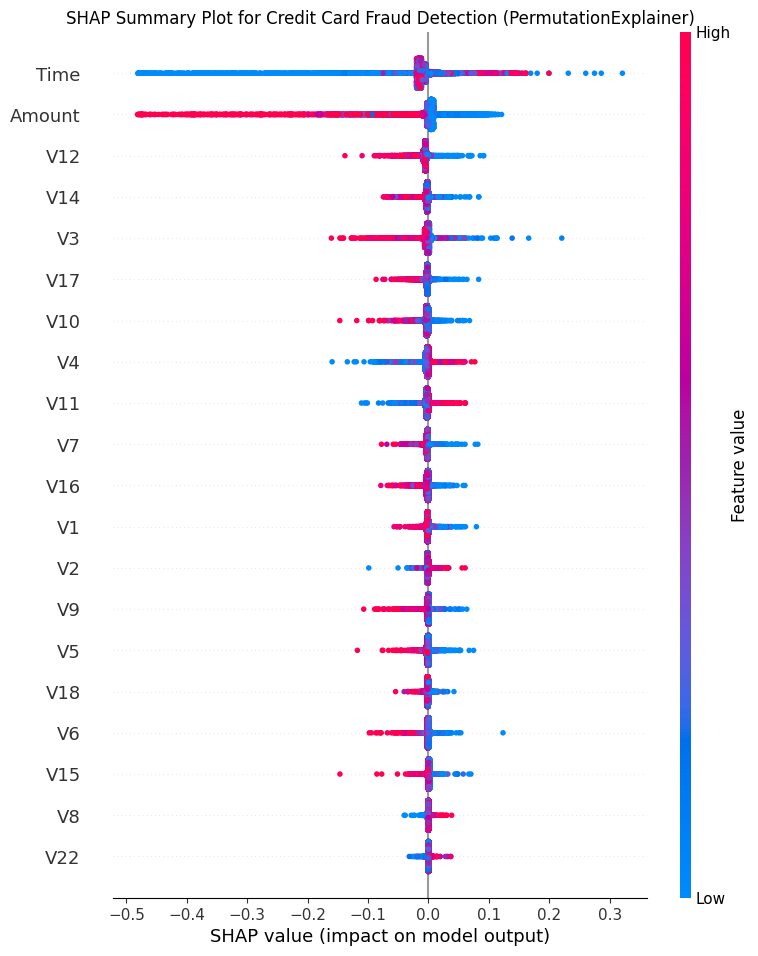

In [12]:
# Use PermutationExplainer
explainer_perm = shap.Explainer(model, X_train_oversampled)
shap_values_perm = explainer_perm(X_cc_val)

# Generate the SHAP summary plot
plt.figure()
shap.summary_plot(shap_values_perm, X_cc_val, feature_names=X_cc_val.columns.tolist(), show=False)
plt.title("SHAP Summary Plot for Credit Card Fraud Detection (PermutationExplainer)")
plt.show()
plt.close()

# Explain Individual Predictions using SHAP Decision Plots with PermutationExplainer

This section defines and uses a function `fraud_prediction_explanation_perm` to generate SHAP decision plots for a few individual predictions made by the trained neural network model on the validation dataset (`X_cc_val`). SHAP decision plots visualize how each feature contributes to the model's prediction for a specific instance, showing the path from the base value (expected model output) to the final prediction. We are using the `PermutationExplainer` here.

**Code Functionality:**

* **`def fraud_prediction_explanation_perm(model, X_train, X_test, y_test, num_explanations=5):`**: Defines a function that takes the trained model, training features, test features, test target, and the number of explanations to generate as input.
    * **`num_explain = min(num_explanations, len(X_test))`**: Determines the actual number of explanations to generate, ensuring it doesn't exceed the number of samples in the test set.
    * **`if num_explain == 0:`**: Handles the case where there are no test samples to explain.
    * **`explainer = shap.Explainer(model, X_train)`**: Initializes a `PermutationExplainer` object using the trained `model` and the training features (`X_train`) as the background dataset.
    * **`shap_values = explainer(X_test)`**: Calculates the SHAP values for the entire test dataset (`X_test`).
    * **`expected_value = np.mean(shap_values.base_values) if hasattr(shap_values, 'base_values') else 0.0`**: Attempts to get the expected value from the SHAP explainer. For `PermutationExplainer`, this might not be directly available, so it falls back to the mean of the base values (if present) or 0.0 as an approximation.
    * **`for i in range(num_explain):`**: Iterates through the first `num_explain` samples in the test set to generate individual explanations.
        * Prints a separator and a header for each explanation.
        * **`shap.decision_plot(...)`**: Generates the SHAP decision plot for the current test sample.
            * `expected_value`: The base value (expected model output).
            * `shap_values[i].values`: The SHAP values for the current sample.
            * `X_test.iloc[i]`: The feature values for the current sample.
            * `show=False`: Prevents immediate display.
            * Sets the title and labels for the plot and then displays it using `plt.show()` and closes it with `plt.close()`.
        * **`probability = model.predict(...)`**: Predicts the probability of fraud for the current test sample.
        * Determines the predicted class ("Fraudulent" if probability > 0.5, "Not Fraudulent" otherwise) and the actual class based on `y_test`.
        * Prints the predicted probability, predicted class, and actual class for the sample.
        * Sorts the features by the absolute value of their SHAP values to determine the most influential features for this specific prediction.
        * Prints the top 3 most influential features, their impact (positive or negative), and their effect on increasing or decreasing the predicted probability of fraud.
    * Prints a final separator after all explanations.
* **`fraud_prediction_explanation_perm(...)`**: Calls the function to generate and display SHAP decision plots for the first 5 samples in the validation set (`X_cc_val`).

**Purpose:**

This block aims to provide a detailed understanding of how the trained neural network makes predictions for individual credit card transactions. The SHAP decision plots visualize the contribution of each feature to the prediction, showing whether a feature's value pushes the prediction towards or away from fraud. By examining these plots and the corresponding predicted probabilities and actual classes, we can gain more insight into the model's reasoning and identify which features are most influential in its fraud detection decisions for specific cases. The analysis of the top influential features further helps in understanding the model's sensitivity to different input variables.

PermutationExplainer explainer: 56963it [58:24, 16.21it/s]                             




Explanation for prediction on test sample 1:



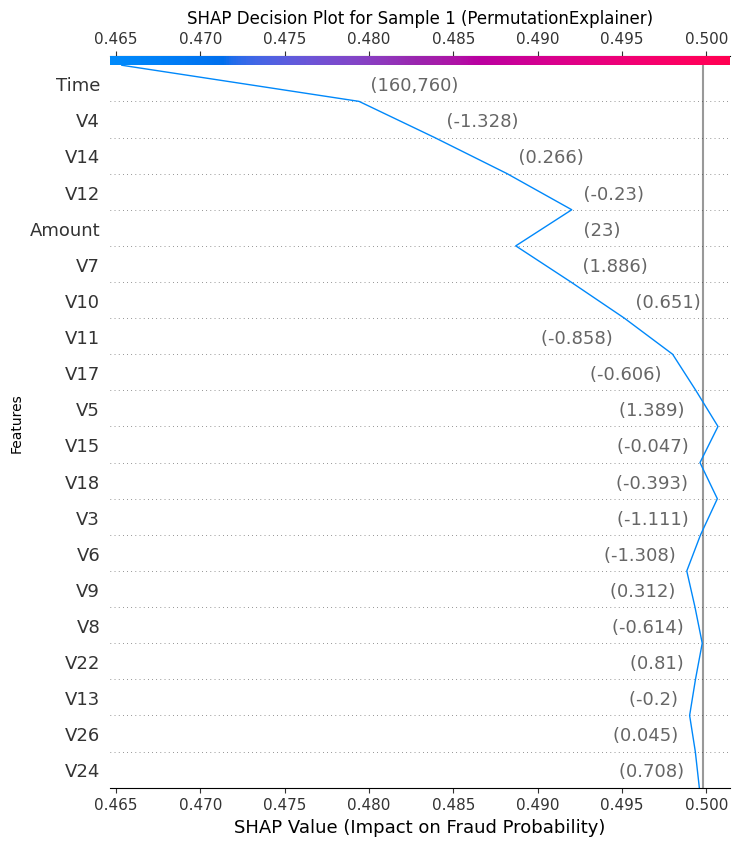

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
  Predicted Probability of Fraud: 0.4654
  Predicted Class: Not Fraudulent
  Actual Class: Not Fraudulent

The Top 3 Most Influential Features on this sample include:

  1. Feature 'Time':
    Impact: 0.0141 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
    Note: This was the most influential feature for this prediction.
------------------------------------------------------------------------------------------
  2. Feature 'V4':
    Impact: 0.0045 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------
  3. Feature 'V14':
    Impact: 0.0043 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------


Explanation for prediction on test samp

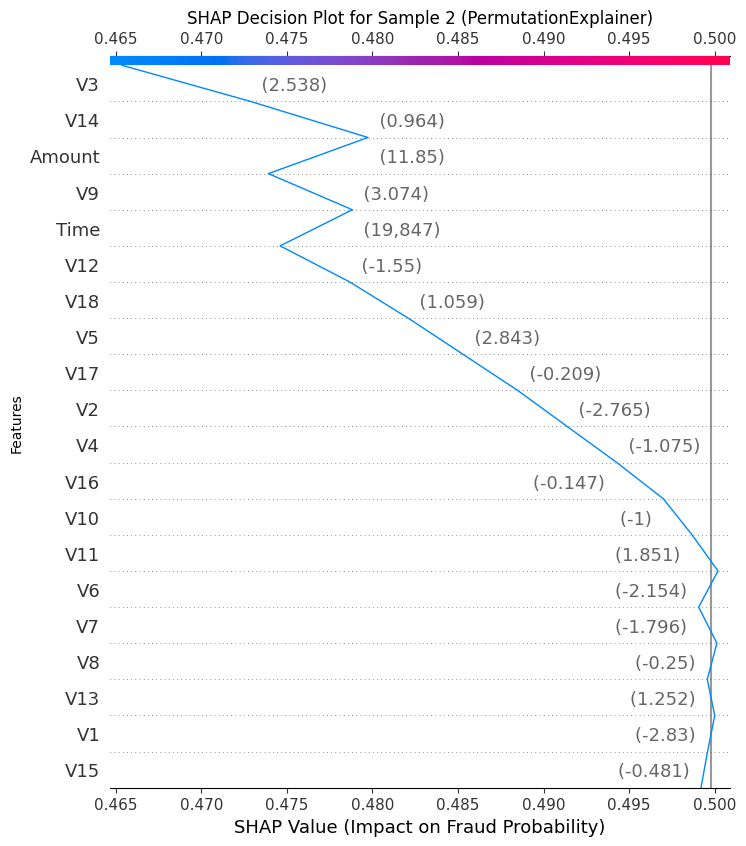

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
  Predicted Probability of Fraud: 0.4654
  Predicted Class: Not Fraudulent
  Actual Class: Not Fraudulent

The Top 3 Most Influential Features on this sample include:

  1. Feature 'V3':
    Impact: 0.0075 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
    Note: This was the most influential feature for this prediction.
------------------------------------------------------------------------------------------
  2. Feature 'V14':
    Impact: 0.0069 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------
  3. Feature 'Amount':
    Impact: 0.0058 (had a positive influence)
    Effect: This feature increased the predicted probability of fraud.
------------------------------------------------------------------------------------------


Explanation for prediction on test sa

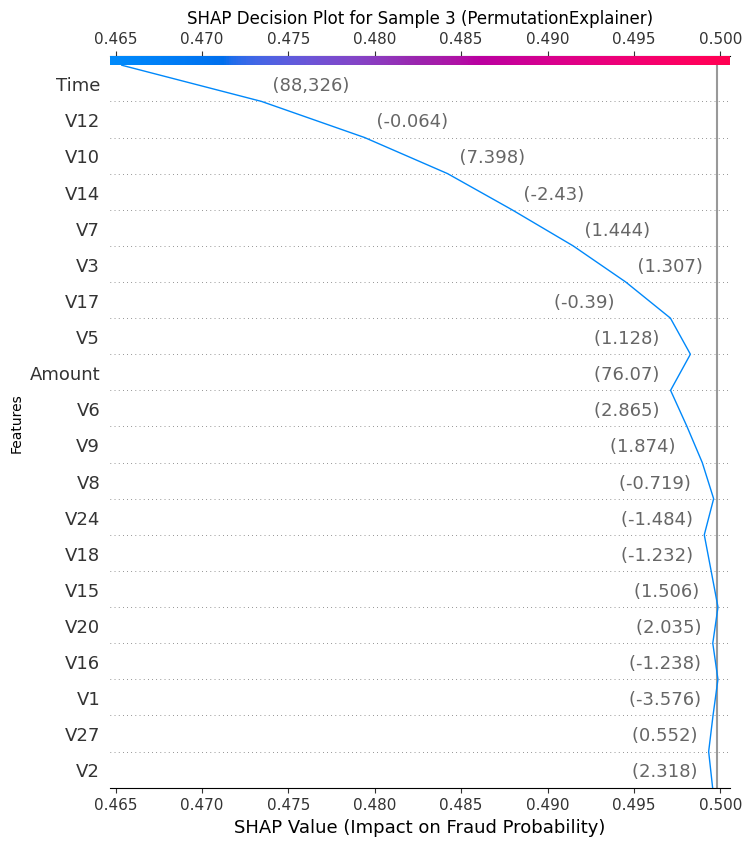

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
  Predicted Probability of Fraud: 0.4654
  Predicted Class: Not Fraudulent
  Actual Class: Not Fraudulent

The Top 3 Most Influential Features on this sample include:

  1. Feature 'Time':
    Impact: 0.0081 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
    Note: This was the most influential feature for this prediction.
------------------------------------------------------------------------------------------
  2. Feature 'V12':
    Impact: 0.0060 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------
  3. Feature 'V10':
    Impact: 0.0048 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------


Explanation for prediction on test sam

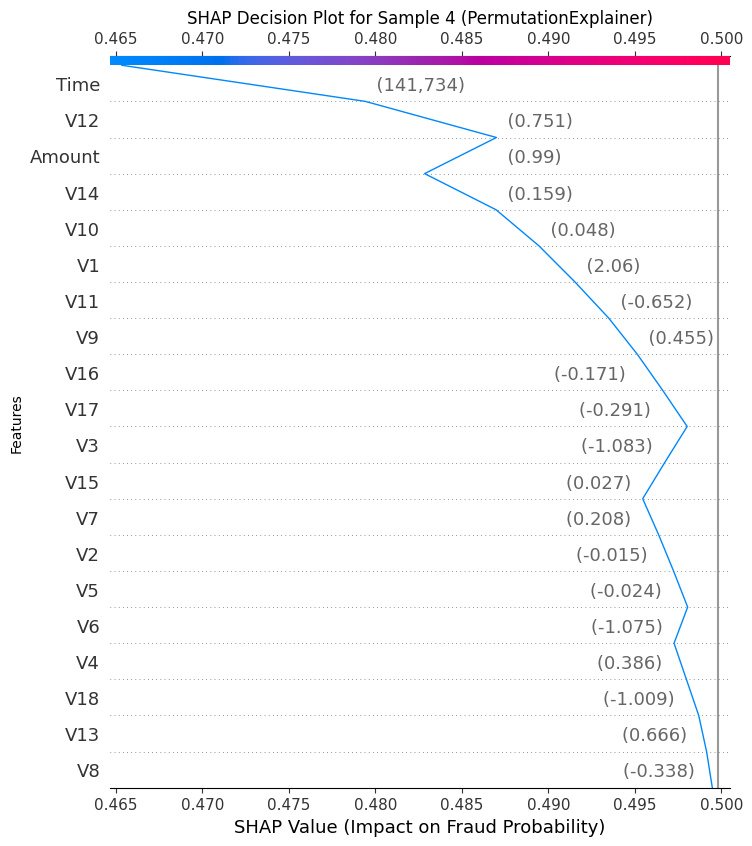

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
  Predicted Probability of Fraud: 0.4654
  Predicted Class: Not Fraudulent
  Actual Class: Not Fraudulent

The Top 3 Most Influential Features on this sample include:

  1. Feature 'Time':
    Impact: 0.0141 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
    Note: This was the most influential feature for this prediction.
------------------------------------------------------------------------------------------
  2. Feature 'V12':
    Impact: 0.0076 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------
  3. Feature 'Amount':
    Impact: 0.0042 (had a positive influence)
    Effect: This feature increased the predicted probability of fraud.
------------------------------------------------------------------------------------------


Explanation for prediction on test 

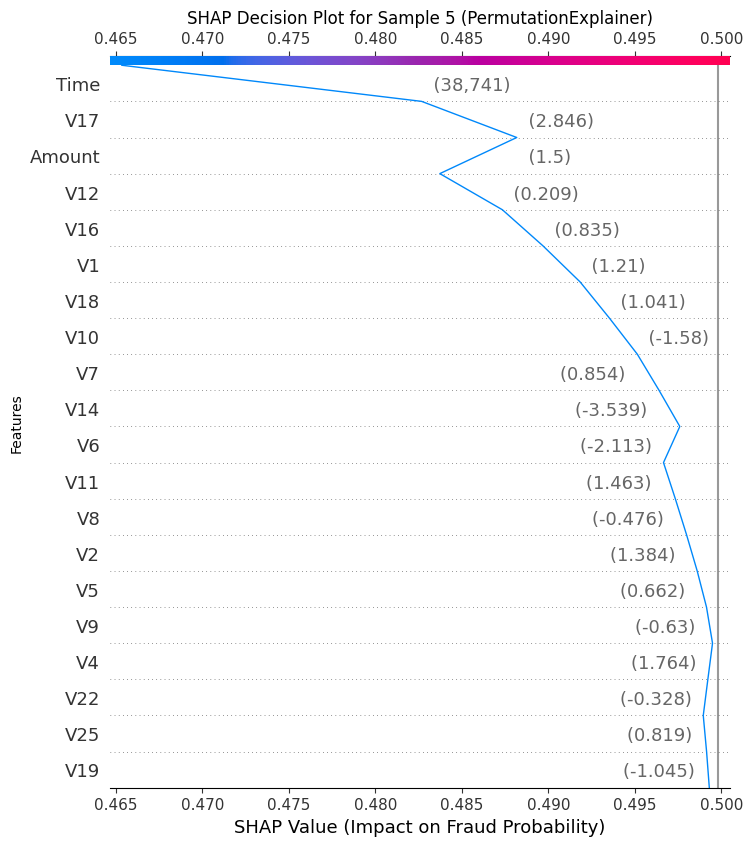

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
  Predicted Probability of Fraud: 0.4654
  Predicted Class: Not Fraudulent
  Actual Class: Not Fraudulent

The Top 3 Most Influential Features on this sample include:

  1. Feature 'Time':
    Impact: 0.0173 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
    Note: This was the most influential feature for this prediction.
------------------------------------------------------------------------------------------
  2. Feature 'V17':
    Impact: 0.0055 (had a negative influence)
    Effect: This feature decreased the predicted probability of fraud.
------------------------------------------------------------------------------------------
  3. Feature 'Amount':
    Impact: 0.0044 (had a positive influence)
    Effect: This feature increased the predicted probability of fraud.
------------------------------------------------------------------------------------------


In [13]:
def fraud_prediction_explanation_perm(model, X_train, X_test, y_test, num_explanations=5):
    """
    Explains predictions using SHAP decision plots with PermutationExplainer.
    """
    num_explain = min(num_explanations, len(X_test))

    if num_explain == 0:
        print("No test samples available for explanation.")
        return

    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # For PermutationExplainer, the expected_value might not be directly available.
    # We can use the mean of the SHAP values over the background dataset as an approximation.
    expected_value = np.mean(shap_values.base_values) if hasattr(shap_values, 'base_values') else 0.0

    for i in range(num_explain):
        print("\n" + "=" * 130)
        print(f"\nExplanation for prediction on test sample {i+1}:\n")

        # SHAP decision plot
        shap.decision_plot(expected_value, shap_values[i].values, X_test.iloc[i], show=False)
        plt.title(f"SHAP Decision Plot for Sample {i+1} (PermutationExplainer)")
        plt.xlabel("SHAP Value (Impact on Fraud Probability)")
        plt.ylabel("Features")
        plt.show()
        plt.close()

        probability = model.predict(X_test.iloc[[i]])[0][0]
        prediction = "Fraudulent" if probability > 0.5 else "Not Fraudulent"
        actual = "Fraudulent" if y_test.iloc[i] == 1 else "Not Fraudulent"

        print(f"  Predicted Probability of Fraud: {probability:.4f}")
        print(f"  Predicted Class: {prediction}")
        print(f"  Actual Class: {actual}\n")

        # Sort features by their absolute SHAP values
        feature_impact = [(name, value) for name, value in zip(X_test.columns, shap_values[i].values)]
        sorted_impact = sorted(feature_impact, key=lambda x: abs(x[1]), reverse=True)

        print("The Top 3 Most Influential Features on this sample include:\n")
        for rank, (name, value) in enumerate(sorted_impact[:3], 1):
            impact = "positive" if value > 0 else "negative"
            direction = "increased" if value > 0 else "decreased"
            print(f"  {rank}. Feature '{name}':")
            print(f"    Impact: {abs(value):.4f} (had a {impact} influence)")
            print(f"    Effect: This feature {direction} the predicted probability of fraud.")
            if rank == 1:
                print("    Note: This was the most influential feature for this prediction.")
            print("-" * 90)

    print("=" * 130)

# Generate explanations for a few predictions using PermutationExplainer
fraud_prediction_explanation_perm(model, X_train_oversampled, X_cc_val, y_cc_val, num_explanations=5)

# Preprocess the Simulated Fraud Transaction Datasets

This section preprocesses the simulated fraud transaction training (`fraudTrain.csv`) and testing (`fraudTest.csv`) datasets to prepare them for training and evaluating machine learning models. The preprocessing steps include handling categorical features, separating features and the target variable, and scaling numerical features. Additionally, oversampling and undersampling techniques are applied to the scaled training data to address potential class imbalance.

**Code Functionality:**

1.  **Drop High Cardinality and Unnecessary Columns:**
    * `cols_to_drop = [...]`: Defines a list of categorical columns with high cardinality and the `trans_num` column, which are deemed less useful for the initial modeling and are therefore dropped from both the training and testing DataFrames.
    * `fraud_train_processed = fraud_train_df.drop(columns=cols_to_drop)`
    * `fraud_test_processed = fraud_test_df.drop(columns=cols_to_drop)`

2.  **One-Hot Encode Categorical Features:**
    * `pd.get_dummies(..., columns=['category', 'gender'], drop_first=True)`: Converts the categorical columns 'category' and 'gender' into numerical representations using one-hot encoding. `drop_first=True` is used to avoid multicollinearity by dropping the first category for each feature.

3.  **Separate Features (X) and Target (y):**
    * `X_train = fraud_train_processed.drop(columns=['is_fraud', 'trans_date_trans_time'])`: Creates the training features DataFrame by dropping the target variable 'is\_fraud' and the timestamp column 'trans\_date\_trans\_time'.
    * `y_train = fraud_train_processed['is_fraud']`: Creates the training target variable Series.
    * `X_test = fraud_test_processed.drop(columns=['is_fraud', 'trans_date_trans_time'])`: Creates the testing features DataFrame.
    * `y_test = fraud_test_processed['is_fraud']`: Creates the testing target variable Series.
    * Prints the shapes of the resulting training and testing feature sets before scaling.

4.  **Scale Numerical Features:**
    * `numerical_cols = [...]`: Defines a list of numerical columns that need to be scaled.
    * `scaler = StandardScaler()`: Initializes a `StandardScaler` object, which standardizes features by removing the mean and scaling to unit variance.
    * `scaler.fit(X_train[numerical_cols])`: Fits the scaler on the numerical columns of the training data, calculating the mean and standard deviation for each of these features.
    * `X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])`: Transforms the numerical columns of the training data using the fitted scaler.
    * `X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])`: Transforms the numerical columns of the testing data using the *same* scaler fitted on the training data. This ensures that the testing data is scaled according to the patterns learned from the training data, preventing data leakage.
    * Prints the head of the scaled training and testing data.

5.  **Apply Oversampling:**
    * `ros = RandomOverSampler(random_state=42)`: Initializes a `RandomOverSampler` to balance the training data by duplicating instances of the minority class ('is\_fraud' = True). `random_state` ensures reproducibility.
    * `X_train_oversampled_scaled, y_train_oversampled_scaled = ros.fit_resample(X_train, y_train)`: Applies oversampling to the scaled training features and target.
    * Prints the shape and class distribution of the oversampled, scaled training data, which should now have an equal number of fraudulent and non-fraudulent samples.

6.  **Apply Undersampling:**
    * `rus = RandomUnderSampler(random_state=42)`: Initializes a `RandomUnderSampler` to balance the training data by randomly removing instances from the majority class ('is\_fraud' = False). `random_state` ensures reproducibility.
    * `X_train_undersampled_scaled, y_train_undersampled_scaled = rus.fit_resample(X_train, y_train)`: Applies undersampling to the scaled training features and target.
    * Prints the shape and class distribution of the undersampled, scaled training data, which should also now have an equal number of fraudulent and non-fraudulent samples (and a smaller overall size).

**Purpose:**

This comprehensive preprocessing block prepares the simulated fraud transaction data for machine learning model training. It handles categorical features through one-hot encoding, scales numerical features to ensure they have a similar impact on the model, and addresses the class imbalance problem using both oversampling and undersampling techniques on the scaled training data. The resulting `X_train_oversampled_scaled`, `y_train_oversampled_scaled`, `X_train_undersampled_scaled`, and `y_train_undersampled_scaled` datasets are now ready to be used for training different models and comparing their performance. The original scaled `X_train` and `y_train` can also be used to train a model without explicit class balancing.

In [14]:
# Drop high cardinality categorical columns and 'trans_num'
cols_to_drop = ['merchant', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
fraud_train_processed = fraud_train_df.drop(columns=cols_to_drop)
fraud_test_processed = fraud_test_df.drop(columns=cols_to_drop)

# One-hot encode 'category' and 'gender'
fraud_train_processed = pd.get_dummies(fraud_train_processed, columns=['category', 'gender'], drop_first=True)
fraud_test_processed = pd.get_dummies(fraud_test_processed, columns=['category', 'gender'], drop_first=True)

# Separate features (X) and target (y) for the processed data
X_train = fraud_train_processed.drop(columns=['is_fraud', 'trans_date_trans_time'])
y_train = fraud_train_processed['is_fraud']
X_test = fraud_test_processed.drop(columns=['is_fraud', 'trans_date_trans_time'])
y_test = fraud_test_processed['is_fraud']

print("Processed Training Data Shape (Before Scaling):", X_train.shape)
print("Processed Test Data Shape (Before Scaling):", X_test.shape)

# Identify numerical columns (after one-hot encoding)
numerical_cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
scaler.fit(X_train[numerical_cols])

# Transform the numerical columns of the training data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])

# Transform the numerical columns of the test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nScaled Training Data Head:")
print(X_train.head())
print("\nScaled Test Data Head:")
print(X_test.head())

# Apply oversampling to the scaled training data
ros = RandomOverSampler(random_state=42)
X_train_oversampled_scaled, y_train_oversampled_scaled = ros.fit_resample(X_train, y_train)

print("\nShape of oversampled scaled training data:", X_train_oversampled_scaled.shape)
print("Fraud distribution in oversampled scaled training data:\n", y_train_oversampled_scaled.value_counts(normalize=True))

# Apply undersampling to the scaled training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled_scaled, y_train_undersampled_scaled = rus.fit_resample(X_train, y_train)

print("\nShape of undersampled scaled training data:", X_train_undersampled_scaled.shape)
print("Fraud distribution in undersampled scaled training data:\n", y_train_undersampled_scaled.value_counts(normalize=True))

Processed Training Data Shape (Before Scaling): (1296675, 24)
Processed Test Data Shape (Before Scaling): (555719, 24)

Scaled Training Data Head:
   Unnamed: 0            cc_num       amt       zip       lat      long  \
0           0  2703186189652095 -0.407826 -0.749136 -0.484420  0.657620   
1           1      630423337322  0.230039  1.872567  2.039120 -2.033870   
2           2    38859492057661  0.934149  1.281042  0.717754 -1.601537   
3           3  3534093764340240 -0.158132  0.402753  1.515617 -1.590766   
4           4   375534208663984 -0.177094 -0.906090 -0.023035  0.782279   

   city_pop  unix_time  merch_lat  merch_long  ...  category_health_fitness  \
0 -0.282589  -1.858664  -0.494354    0.593864  ...                    False   
1 -0.293670  -1.858662   2.078699   -2.030341  ...                    False   
2 -0.280406  -1.858662   0.902849   -1.592323  ...                    False   
3 -0.287742  -1.858660   1.662886   -1.621848  ...                    False   
4 -0.29

# Define and Compile a Neural Network for Fraud Detection (Imbalanced Data)

This section defines the architecture of a simple multi-layer perceptron (MLP) neural network designed for binary classification of fraudulent transactions. This model will be trained on the original, imbalanced simulated fraud training data.

**Code Functionality:**

* **`input_shape = (X_train.shape[1],)`**: Determines the expected input shape for the first layer of the neural network. `X_train.shape[1]` gives the number of features in the training data, which is set as the input dimension.
* **`model_fraud = keras.Sequential([...])`**: Creates a sequential Keras model, where layers are added in a linear stack. This model is named `model_fraud` to indicate its intended use on the original, imbalanced data.
    * **`keras.layers.Input(shape=input_shape)`**: Defines the input layer of the neural network, specifying the expected shape of the input data (number of features).
    * **`keras.layers.Dense(64, activation='relu')`**: Adds a dense (fully connected) layer with 64 neurons and the ReLU (Rectified Linear Unit) activation function. ReLU is a common activation function that introduces non-linearity to the model.
    * **`keras.layers.Dense(32, activation='relu')`**: Adds another dense layer with 32 neurons and ReLU activation.
    * **`keras.layers.Dense(1, activation='sigmoid')`**: Adds the output dense layer with a single neuron and the sigmoid activation function. The sigmoid function outputs a probability between 0 and 1, which is suitable for binary classification tasks (predicting whether a transaction is fraudulent or not).
* **`model_fraud.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Accuracy', 'Precision', 'Recall'])`**: Configures the model for training.
    * `optimizer='adam'`: Specifies the Adam optimization algorithm, an efficient gradient-based optimizer.
    * `loss='binary_crossentropy'`: Defines the loss function to be minimized during training, appropriate for binary classification.
    * `metrics=['AUC', 'Accuracy', 'Precision', 'Recall']`: Specifies the evaluation metrics to be computed and tracked during training and evaluation. AUC (Area Under the ROC Curve) is particularly useful for imbalanced datasets, while accuracy, precision, and recall provide additional insights into the model's performance.
* **`model_fraud.summary()`**: Prints a summary of the `model_fraud` architecture, including the number of layers, the output shape of each layer, and the total number of trainable parameters. This provides a concise overview of the model's structure and complexity.

**Purpose:**

This block defines a basic neural network architecture for binary classification and prepares it for training on the original, potentially imbalanced, simulated fraud transaction data. The model consists of an input layer, two hidden layers with ReLU activation, and a sigmoid output layer. It is compiled with the Adam optimizer, binary cross-entropy loss, and relevant evaluation metrics. The `model.summary()` provides a confirmation of the model's structure before training.

In [15]:
# The original training data (imbalanced) has 25 features
input_shape = (X_train.shape[1],)

model_fraud = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_fraud.compile(optimizer='adam',
                               loss='binary_crossentropy',
                               metrics=['AUC', 'Accuracy', 'Precision', 'Recall'])

model_fraud.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Neural Network on the Original, Imbalanced Training Data

This section trains the `model_fraud` neural network using the original, scaled but imbalanced training features (`X_train`) and target (`y_train`). A portion of the training data is set aside as a validation set to monitor the model's performance on unseen data during training.

**Code Functionality:**

* **`model_results_imbalanced = model_fraud.fit(...)`**: Initiates the training process of the `model_fraud`.
    * `X_train`: The scaled features of the original training dataset.
    * `y_train`: The target variable (fraudulent or not) of the original training dataset.
    * `epochs=10`: The number of times the entire training dataset will be passed through the network.
    * `batch_size=32`: The number of training samples processed in each batch during training.
    * `validation_split=0.2`: Specifies that 20% of the training data will be used as a validation set. This data is not used for training but is used to evaluate the model's performance at the end of each epoch. This helps in detecting overfitting.
    * `verbose=1`: Sets the verbosity level to display progress during training. The output will show the loss and metrics (AUC, Accuracy, Precision, Recall) for both the training and validation sets at each epoch.
* The training history, including the loss and metrics at each epoch for both the training and validation sets, is stored in the `model_results_imbalanced` variable. This information can be analyzed to understand how well the model learned from the imbalanced data and whether it started to overfit.

**Purpose:**

The purpose of this block is to train a baseline neural network model on the original, imbalanced fraud transaction data. By monitoring the performance on the validation set, we can assess the model's ability to generalize to unseen data without any explicit class balancing techniques applied. The results of this training will serve as a point of comparison for models trained on balanced versions of the data (oversampled and undersampled).

In [16]:
# Train on the original, imbalanced training data
model_results_imbalanced = model_fraud.fit(X_train, y_train,
                                           epochs=10,
                                           batch_size=32,
                                           validation_split=0.2,
                                           verbose=1)

Epoch 1/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - AUC: 0.5001 - Accuracy: 0.9880 - Precision: 0.0062 - Recall: 0.0066 - loss: 110423441408000.0000 - val_AUC: 0.5000 - val_Accuracy: 0.9941 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0653
Epoch 2/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step - AUC: 0.4988 - Accuracy: 0.9942 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.0407 - val_AUC: 0.5000 - val_Accuracy: 0.9941 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0363
Epoch 3/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - AUC: 0.4999 - Accuracy: 0.9943 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.0354 - val_AUC: 0.5000 - val_Accuracy: 0.9941 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0363
Epoch 4/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step - AUC: 0.5000 - Accuracy: 0.9943 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.0352 - val_AUC: 0.5000 - val_Accuracy: 0.9941 - val_Precisio

# Oversample the Original Training Data

This section applies the `RandomOverSampler` to the original, scaled training data (`X_train`, `y_train`) to create a balanced dataset by duplicating instances of the minority class (fraudulent transactions).

**Code Functionality:**

* **`ros = RandomOverSampler(random_state=42)`**: Initializes an instance of the `RandomOverSampler`. The `random_state=42` ensures the oversampling process is reproducible.
* **`X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)`**: Applies the oversampling technique to the training features and target. The `fit_resample` method learns the class distribution and then duplicates minority class instances until both classes have an equal number of samples. The resulting oversampled features are stored in `X_train_oversampled`, and the corresponding target variables in `y_train_oversampled`.
* **`print("Shape of oversampled training data:", X_train_oversampled.shape)`**: Prints the shape of the resulting oversampled training data, which will have more samples than the original training data due to the duplication of the minority class.
* **`print("Fraud distribution in oversampled training data:\n", y_train_oversampled.value_counts(normalize=True))`**: Prints the normalized class distribution in the oversampled training target variable. In a perfectly balanced dataset after oversampling, both classes should have a proportion of 0.5.

**Purpose:**

The purpose of this block is to create a balanced training dataset to potentially improve the performance of the fraud detection model, particularly its ability to correctly identify fraudulent transactions. Training on a balanced dataset can mitigate the bias towards the majority class that models often develop when trained on imbalanced data. The printed shape and class distribution confirm that the oversampling has been applied and the dataset is now balanced.

In [17]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the original training data
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

print("Shape of oversampled training data:", X_train_oversampled.shape)
print("Fraud distribution in oversampled training data:\n", y_train_oversampled.value_counts(normalize=True))

Shape of oversampled training data: (2578338, 24)
Fraud distribution in oversampled training data:
 is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


# Train the Neural Network on the Oversampled Training Data

This section trains the `model_fraud` neural network (the same architecture used for the imbalanced data) using the oversampled training features (`X_train_oversampled`) and target (`y_train_oversampled`). The aim is to evaluate whether training on a balanced dataset improves the model's performance in detecting fraud.

**Code Functionality:**

* **`model_oversampled_results = model_fraud.fit(...)`**: Initiates the training process of the `model_fraud` using the oversampled data.
    * `X_train_oversampled`: The scaled and oversampled training features (now balanced).
    * `y_train_oversampled`: The target variable for the oversampled training data.
    * `epochs=10`: The number of training epochs.
    * `batch_size=32`: The batch size used during training.
    * `validation_split=0.2`: Specifies that 20% of the *oversampled* training data will be used as a validation set during training. This allows for monitoring the model's performance on a balanced, unseen portion of the oversampled data.
    * `verbose=1`: Sets the verbosity level to display training progress. The output will show the loss and metrics (AUC, Accuracy, Precision, Recall) for both the training and the validation subsets of the oversampled data at each epoch.
* The training history is stored in the `model_oversampled_results` variable, which can be used to analyze the model's learning curve and performance on the balanced validation set.

**Purpose:**

This block trains the neural network on a balanced dataset created through oversampling. By comparing the validation performance here with the validation performance when training on the imbalanced data, we can gain insights into the impact of oversampling on the model's ability to learn and generalize, particularly in the context of a balanced training environment. It's important to note that the validation here is also on a balanced subset of the oversampled data, which might differ from the model's performance on the original imbalanced test set.

In [18]:
# Train the same model on the oversampled training data
model_oversampled_results = model_fraud.fit(X_train_oversampled, y_train_oversampled,
                                            epochs=10,
                                            batch_size=32,
                                            validation_split=0.2,
                                            verbose=1)

Epoch 1/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - AUC: 0.5000 - Accuracy: 0.6251 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.7686 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9685
Epoch 2/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 93s 1ms/step - AUC: 0.4991 - Accuracy: 0.6249 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6617 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9893
Epoch 3/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - AUC: 0.5000 - Accuracy: 0.6252 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6615 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9805
Epoch 4/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - AUC: 0.5005 - Accuracy: 0.6256 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6613 - val_AUC: 0.0000e+00 - val_Accuracy:

# Train the Neural Network on the Undersampled Training Data

This section trains the `model_fraud` neural network using the undersampled and scaled training features (`X_train_undersampled_scaled`) and target (`y_train_undersampled_scaled`). The goal is to assess the impact of training on a balanced dataset created by reducing the number of majority class instances.

**Code Functionality:**

* **`model_undersampled_results = model_fraud.fit(...)`**: Initiates the training process of the `model_fraud` using the undersampled data.
    * `X_train_undersampled_scaled`: The scaled and undersampled training features (now balanced but smaller).
    * `y_train_undersampled_scaled`: The target variable for the undersampled training data.
    * `epochs=10`: The number of training epochs.
    * `batch_size=32`: The batch size used during training.
    * `validation_split=0.2`: Specifies that 20% of the *undersampled* training data will be used as a validation set during training. This allows for monitoring the model's performance on a balanced, unseen portion of the undersampled data.
    * `verbose=1`: Sets the verbosity level to display training progress, showing the loss and metrics (AUC, Accuracy, Precision, Recall) for both the training and the validation subsets of the undersampled data at each epoch.
* The training history is stored in the `model_undersampled_results` variable, which can be used to analyze the model's learning curve and performance when trained on the undersampled data.

**Purpose:**

This block trains the neural network on a balanced dataset created through undersampling. By comparing the validation performance here with the performance when training on the imbalanced and oversampled data, we can evaluate the effectiveness of undersampling as a strategy for handling class imbalance in this fraud detection task. Undersampling reduces the size of the training data, which can speed up training but might also lead to the loss of potentially valuable information from the majority class.

In [19]:
# Train the same model on the undersampled training data
model_undersampled_results = model_fraud.fit(X_train_undersampled_scaled, y_train_undersampled_scaled,
                                             epochs=10,
                                             batch_size=32,
                                             validation_split=0.2,
                                             verbose=1)

Epoch 1/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4974 - Accuracy: 0.6312 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6585 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9751
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4868 - Accuracy: 0.6210 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6636 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9824
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4921 - Accuracy: 0.6173 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6656 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.9835
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.4917 - Accuracy: 0.6194 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6645 - val_AUC: 0.0000e+00 - val_Accuracy: 0.0000e+00 - val_Pr

In [33]:
!pip freeze > requirements.txt